In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tex_fonts = {
    # Use LaTeX to write all text
    #"text.usetex": True,
    "font.family": "sans-serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 8,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

In [ ]:
def plot_data_neg_prob_axis(data,prop,lw_big,lw_small,color,window_size=1,ax=None,suppress_smaller=None): 
    #suppress_smaller does not plot values and consider for the mean which are smaller than  given number
    markers=['o','s','<','v','h','P','*','^','8','p','H','d','D','X']
    if(ax is None):
        ax=plt.gca()
        
    ax.plot([-15,1000],[0,0],'gray',lw=lw_small,zorder=0)
    ax.plot([-15,1000],[1,1],'gray',lw=lw_small,zorder=0)    

    
    if(suppress_smaller is not None):
        data_to_plot=data.drop(data[data['total_positive']<suppress_smaller].index)
    else:
        data_to_plot=data

        
    #sns.scatterplot(data=data_to_plot,x='prob_neg_label_positive',y=prop,style='dataset',markers=markers,color=color,ax=ax,s=80)

    sns.lineplot(data=data_to_plot,x='prob_neg_label_positive',y=prop,style='dataset',markers=markers,color=color,ax=ax)

    # window average
    data_to_plot=data_to_plot[[prop,'prob_neg_label_positive']].to_numpy()
    props=np.unique(data_to_plot[:,1])
    val=[]
       
    
    for c in props:
        val.append(np.mean( data_to_plot[(data_to_plot[:,1]>=c-window_size) & (data_to_plot[:,1]<=c+window_size) ,0]))
        
        
    val=np.array(val)
    ax.plot(props,val,color=color,linewidth=lw_big)
    
    

    # axis settings
    plt.setp(ax.spines.values(), linewidth=1)


    
    ax.tick_params(axis='both', which='major', labelsize=8)
    #ticks
    yticks=np.arange(0,1.5,0.1)
    xticks=yticks
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_yticklabels('' for tick in yticks)
    #now remove labeles
    ax.set_xticklabels(['' for tick in xticks])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend([],[], frameon=False)
    ax.set_ylim([-0.04,1.04])
    ax.set_xlim([-0.04,1.04])    

In [ ]:
def calc_smooted_profiles(data,prop,window_size=1,suppress_smaller=None):


    if(suppress_smaller is not None):
        data_to_plot=data.drop(data[data['total_positive']<suppress_smaller].index)
    else:
        data_to_plot=data

    data_to_plot=data_to_plot[[prop,'concentration']].to_numpy()
    concentrations=np.unique(data_to_plot[:,1])
    val=[]
       
    for c in concentrations:
        val.append(np.mean( data_to_plot[(data_to_plot[:,1]>=c-window_size) & (data_to_plot[:,1]<=c+window_size) ,0]))
        
        
    return {'prop':prop ,'val': np.array(val)}


def calc_smooted_profiles_neg_prob_axis(data,prop,window_size=1,suppress_smaller=None,gived_grid=None,exclusive=None):

    if(suppress_smaller is not None):
        data_to_plot=data.drop(data[data['total_positive']<suppress_smaller].index)
    else:
        data_to_plot=data

    data_to_plot=data_to_plot[[prop,'prob_neg_label_positive']].to_numpy()
    val_mean=[]
    val_std=[]

    if(exclusive  is None):  #symmetric mean so actual window size is 2* window_size
        
        if(gived_grid is None):  #over the grid given by unique values measured
            props=np.unique(data_to_plot[:,1]) # 
        else:  

            props=gived_grid.copy()
            
        for c in props:
            val_mean.append(np.mean( data_to_plot[(data_to_plot[:,1]>=c-window_size) & (data_to_plot[:,1]<=c+window_size) ,0]))
            val_std.append(np.std( data_to_plot[(data_to_plot[:,1]>=c-window_size) & (data_to_plot[:,1]<=c+window_size) ,0])/np.sqrt(len(data_to_plot[(data_to_plot[:,1]>=c-window_size) & (data_to_plot[:,1]<=c+window_size) ,0])))


        dic={'prop':prop ,'mean': np.array(val_mean),'std': np.array(val_std),'grid':props}  
        
    else: #
        props=gived_grid.copy()
        for i,c in enumerate(props[:-1]):
            val_mean.append(np.mean( data_to_plot[(data_to_plot[:,1]>=c) & (data_to_plot[:,1]<props[i+1]) ,0]))
            val_std.append(np.std( data_to_plot[(data_to_plot[:,1]>=c) & (data_to_plot[:,1]<props[i+1]) ,0])/np.sqrt(len( data_to_plot[(data_to_plot[:,1]>=c) & (data_to_plot[:,1]<props[i+1]) ,0])))

        dic={'prop':prop ,'mean': np.array(val_mean),'std': np.array(val_std),'grid':props[:-1]}  

    return dic
    

In [ ]:
def plot_profiles_given_grid(given_grid,data,prop,lw,ax,suppres_legend=True): 
   
    #sns.lineplot(data=data,x='prob_pos_label_positive',y=prop,hue='ab',ax=ax)
    for c in data.ab.unique():
        y=data.loc[data.ab==c,prop].values
        ymask = np.isfinite(y)
        ax.plot(given_grid[ymask],y[ymask],lw=lw,label=c)
        #sns.lineplot(data=data[data.ab==c],x='prob_neg_label_positive',y=prop,ax=ax,lw=lw,label=c)
    
    ax.set_xlim([0,1])
    ax.set_ylim([-0.01,1.01])

    # axis settings
    

    # axis settings
    plt.setp(ax.spines.values(), linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=8)

    ax.set_xlabel('')
    ax.set_ylabel('')
    if(suppres_legend):
        ax.legend([],[], frameon=False)

In [ ]:
def plot_profiles(data,prop,lw,ax,suppres_legend=True): 
   
    colors = ['#800080', '#008000', '#B8860B', '#F1435AFF', '#2F4F4F', '#8B0000'] 
    for i,c in enumerate(data.ab.unique()):
        x=data[data.ab==c].prob_neg_label_positive_mean.values
        y=data.loc[data.ab==c,f'{prop}_mean'].values
        e=data.loc[data.ab==c,f'{prop}_std'].values

        ax.plot(x,y,lw=lw,color=colors[i % len(colors)])
        ax.fill_between(x, 
                   y- e,
                    y + e,
                    alpha=0.2,color=colors[i % len(colors)])
    
    # axis settings
    plt.setp(ax.spines.values(), linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=8)
    #ticks
    
    yticks=np.arange(0,1.5,0.1)
    ax.set_xticks(yticks)
    ax.set_yticks(yticks)
    #now remove labeles
    ax.set_xticklabels(['' for tick in yticks])
    ax.set_yticklabels(['' for tick in yticks])
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    ax.set_xlim([0,1])
    ax.set_ylim([-0.02,1.02])
    if(suppres_legend):
        ax.legend([],[], frameon=False)
 

In [ ]:
# Profiles reltive to probability of beeing positive    

In [ ]:
# smooted on concentration
col=[]
for i in range(5): # for every antibiotic
    foo=[]
    for j,p in enumerate(props):
        if(j==0):
            foo.append(calc_smooted_profiles(df[i][[p,'concentration','dataset','total_positive']],p,window_size[i]))
        
        else:
            foo.append(calc_smooted_profiles(df[i][[p,'concentration','dataset','total_positive']],p,window_size[i],suppress_smaller=3))
    col.append(pd.DataFrame(foo))

In [ ]:
gived_grid=np.arange(0,1.1,0.1)
gived_grid=np.arange(0,1.1,0.25)

In [ ]:
gived_grid

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [ ]:
# smooth on neg drop prob 
window_size= 0.125 * np.ones(5) # 0.05
props=[f'prob_pos_label_{l}' for l  in ['positive','planktonic','clumped','rods','filaments']]

col=[]

props=props+['prob_neg_label_positive']
for i in range(5): # for every antibiotic
    foo=[]
    for j,p in enumerate(props[1:]):
         foo.append(calc_smooted_profiles_neg_prob_axis(df[i][[p,'prob_neg_label_positive','dataset','total_positive']],p,window_size[i],suppress_smaller=3))
         #foo.append(calc_smooted_profiles_neg_prob_axis(df[i][[p,'prob_neg_label_positive','dataset','total_positive']],p,window_size[i],suppress_smaller=3,gived_grid=gived_grid))
         #foo.append(calc_smooted_profiles_neg_prob_axis(df[i][[p,'prob_neg_label_positive','dataset','total_positive']],p,window_size[i],suppress_smaller=3,gived_grid=gived_grid,exclusive=True))

    col.append(pd.DataFrame(foo))

In [ ]:
def transform_with_concat(df):
    series_list = []
    for name, mean_array, std_array in zip(df['prop'], df['mean'], df['std']):
        # Create series for mean values with '_mean' postfix
        mean_series = pd.Series(mean_array, name=f"{name}_mean")
        series_list.append(mean_series)
        
        # Create series for std values with '_std' postfix
        std_series = pd.Series(std_array, name=f"{name}_std")
        series_list.append(std_series)
    
    return pd.concat(series_list, axis=1)


ab_list=['Genta','Cipro','Amp','Tetra','Chp']
new_df=[]
for i,c in enumerate(col):
    foo=transform_with_concat(c)
    foo['ab']=ab_list[i]
    new_df.append(foo)
    
dg = pd.concat(new_df)    

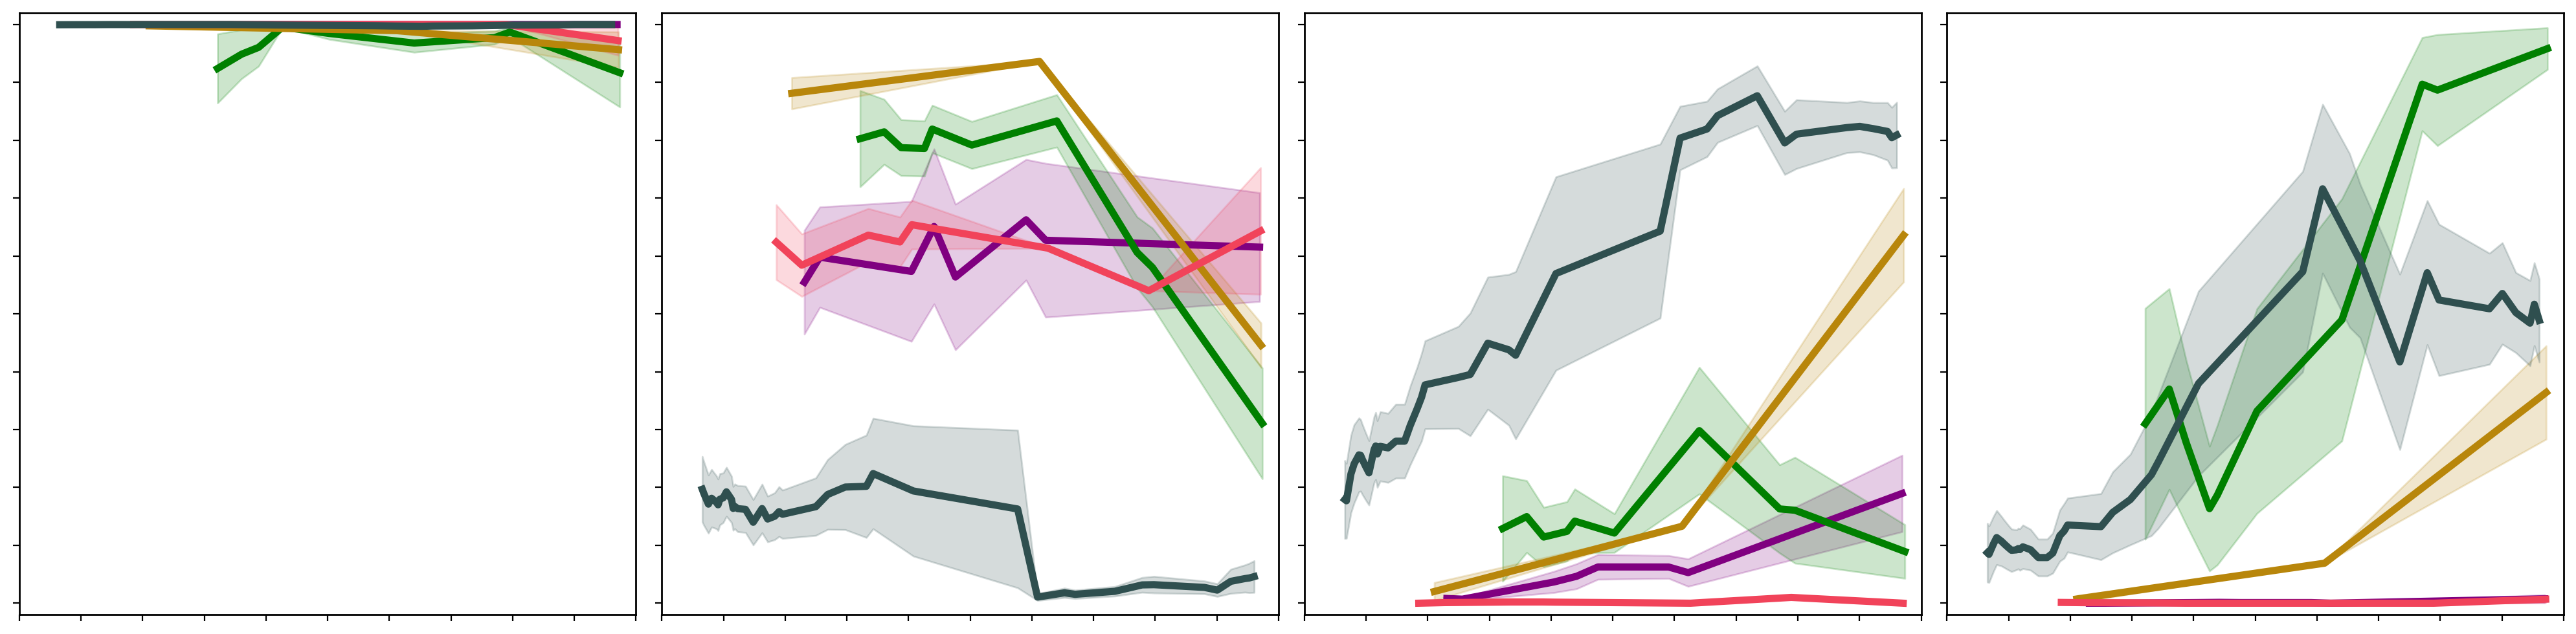

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20, 5),dpi=200 )

plot_profiles(dg,props[1],lw_big,axs[0])  

for j,p in enumerate(props[2:-1]):
    plot_profiles(dg,p,lw_big,axs[j+1])  

'''
classes=['planktonic','clumped','rods','filamentous']
for i,a in enumerate(axs):
    a.set_title(classes[i])
'''
#axs[0].set_ylabel('prob. label')

#axs[0].legend(labels=ab_list)
#axs[1].set_xlabel('prob. neg. droplet')
plt.rcParams.update(tex_fonts)
fig.tight_layout()

In [ ]:
fig.savefig('Figures/ProfilesRelNegProb.pdf', bbox_inches='tight',format='pdf',transparent=True)

KeyError: "['prob_pos_label_planktonic', 'prob_neg_label_positive'] not in index"

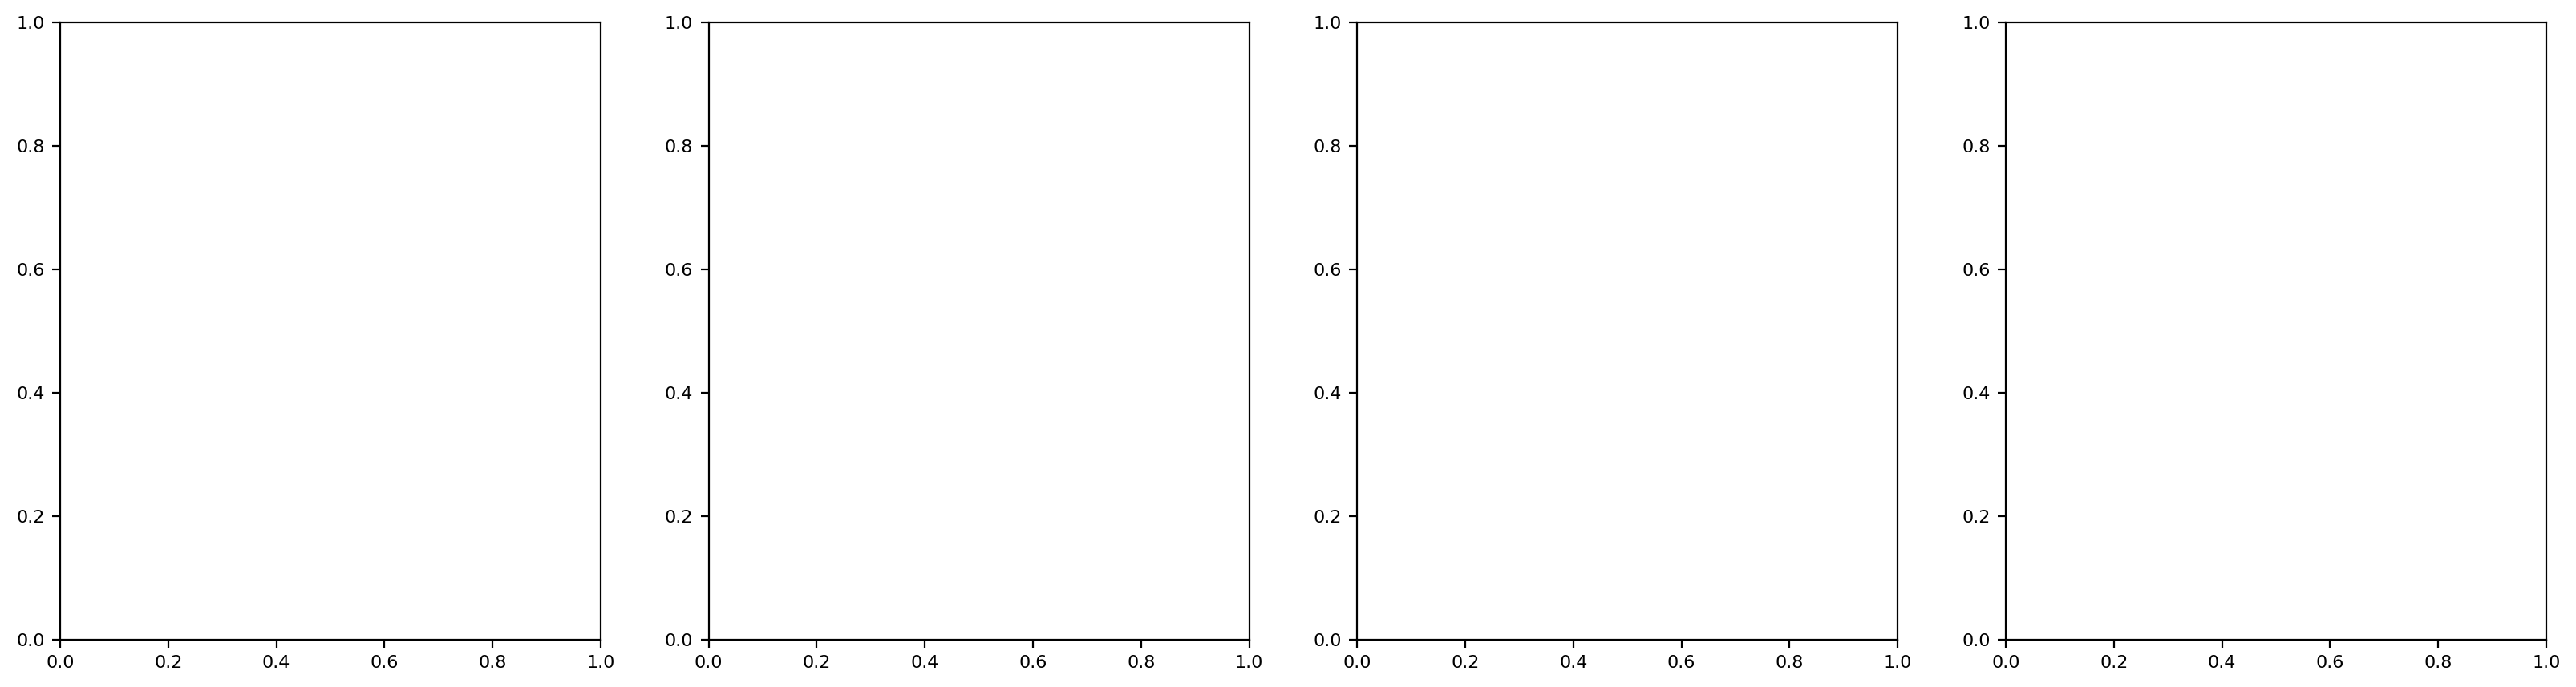

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20, 5),dpi=200 )

plot_profiles_given_grid(gived_grid,dg[[props[1],'prob_neg_label_positive','ab']],props[1],lw_big,axs[0],suppres_legend=False)  

for j,p in enumerate(props[2:-1]):
    plot_profiles_given_grid(gived_grid,dg[[p,'prob_neg_label_positive','ab']],p,lw_big,axs[j+1])  


'''
plot_profiles_given_grid(gived_grid[:-1],dg[[props[1],'prob_neg_label_positive','ab']],props[1],lw_big,axs[0],suppres_legend=False)  

for j,p in enumerate(props[2:-1]):
    plot_profiles_given_grid(gived_grid[:-1],dg[[p,'prob_neg_label_positive','ab']],p,lw_big,axs[j+1])  

'''

classes=['planktonic','clumped','rods','filamentous']
for i,a in enumerate(axs):
    a.set_title(classes[i])

axs[0].set_ylabel('prob. label')

axs[0].legend(labels=ab_list)
axs[1].set_xlabel('prob. neg. droplet')
plt.rcParams.update(tex_fonts)
fig.tight_layout()

KeyError: "['prob_pos_label_planktonic', 'prob_neg_label_positive'] not in index"

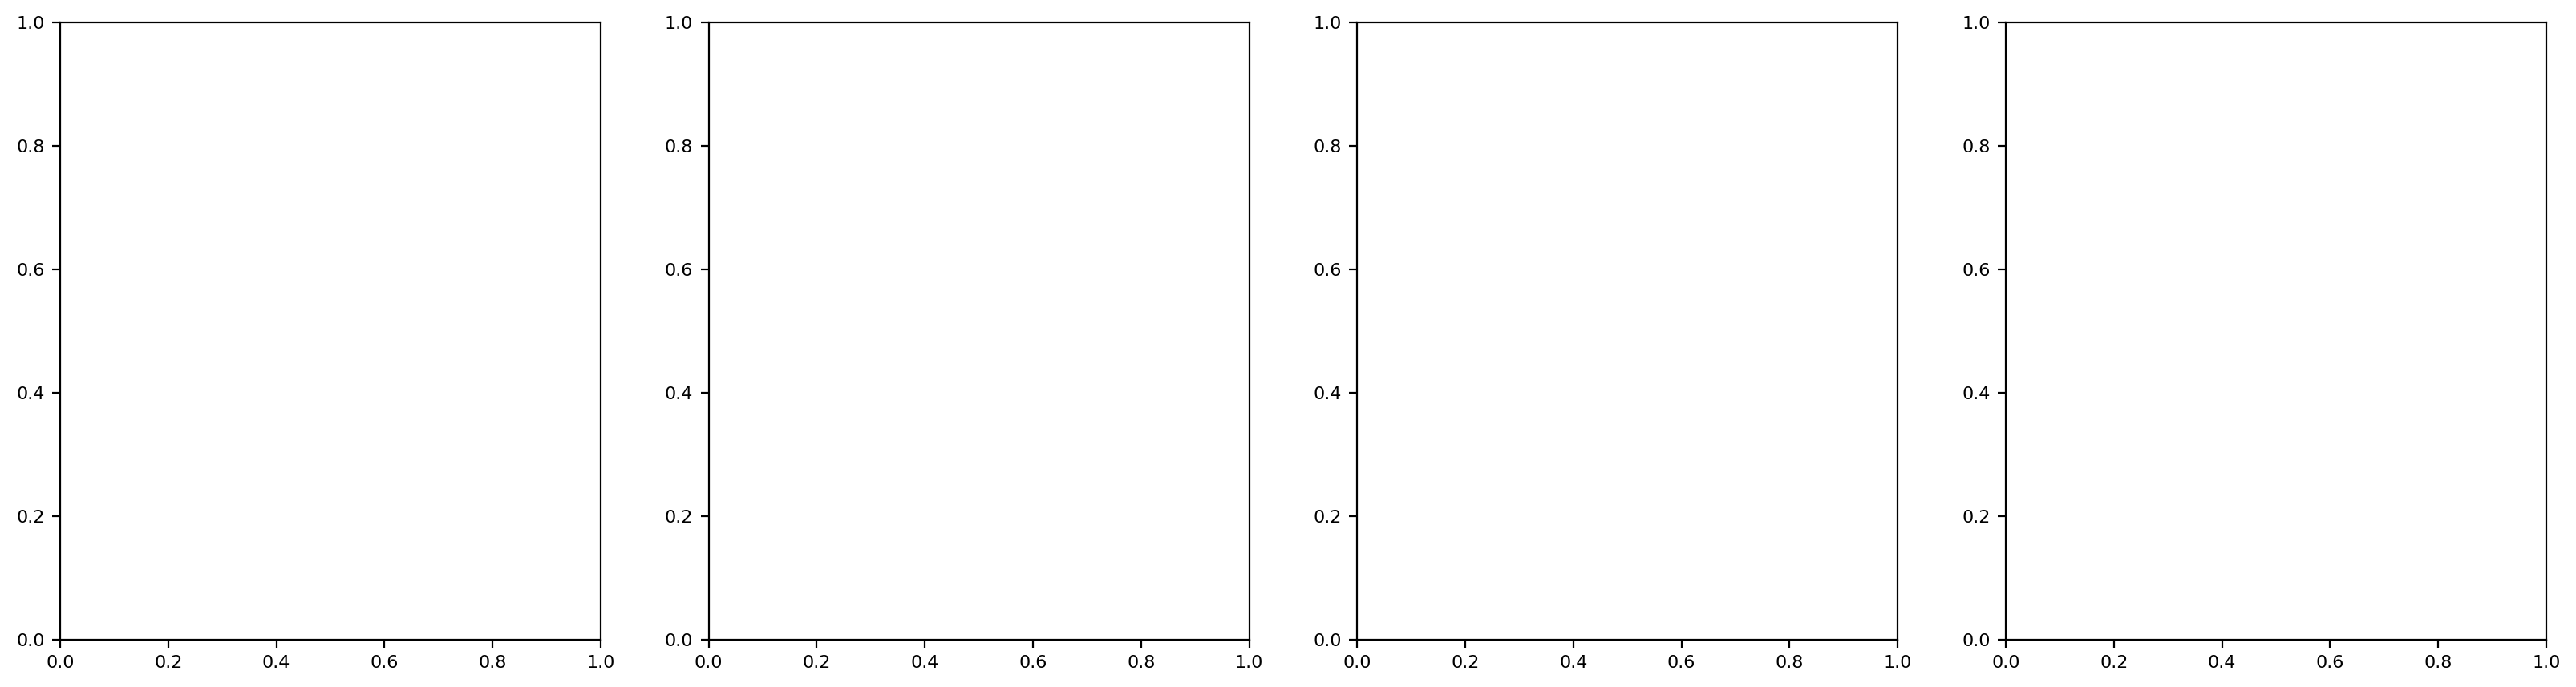

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20, 5),dpi=200 )

plot_profiles(dg[[props[1],'prob_neg_label_positive','ab']],props[1],lw_big,axs[0],suppres_legend=False)  

for j,p in enumerate(props[2:-1]):
    plot_profiles(dg[[p,'prob_neg_label_positive','ab']],p,lw_big,axs[j+1])  


classes=['planktonic','clumped','rods','filamentous']
for i,a in enumerate(axs):
    a.set_title(classes[i])

axs[0].set_ylabel('prob. label')

axs[0].legend(labels=ab_list)
axs[1].set_xlabel('prob. neg. droplet')
plt.rcParams.update(tex_fonts)
fig.tight_layout()